In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans

In [2]:
wine_data = datasets.load_wine()

In [3]:
df = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)

In [4]:
print(df.head())

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                     

In [5]:
X = df[["alcohol","color_intensity"]]
sc = preprocessing.StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)
print(type(X_norm))

<class 'numpy.ndarray'>


In [6]:
cls = KMeans(n_clusters=5)
result = cls.fit(X_norm)

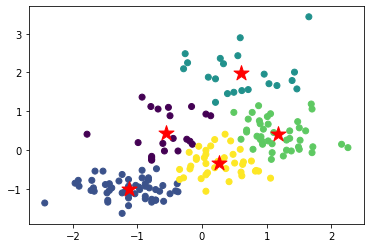

In [7]:
plt.scatter(X_norm[:,0],X_norm[:,1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s = 250, marker='*', c = 'red')
plt.show()

In [8]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [9]:
df_array = np.array([df['alcohol'].tolist(), df['malic_acid'].tolist(), df['ash'].tolist(), df['alcalinity_of_ash'].tolist(), df['magnesium'].tolist(), df['total_phenols'].tolist()], np.float32)

In [21]:
df_array

array([[ 14.23,   1.71,   2.43,  15.6 , 127.  ,   2.8 ],
       [ 13.2 ,   1.78,   2.14,  11.2 , 100.  ,   2.65],
       [ 13.16,   2.36,   2.67,  18.6 , 101.  ,   2.8 ],
       ...,
       [ 13.27,   4.28,   2.26,  20.  , 120.  ,   1.59],
       [ 13.17,   2.59,   2.37,  20.  , 120.  ,   1.65],
       [ 14.13,   4.1 ,   2.74,  24.5 ,  96.  ,   2.05]], dtype=float32)

In [10]:
df_array = df_array.T 

In [11]:
pred = cls.fit_predict(df_array)

In [12]:
pred

array([3, 0, 0, 4, 3, 4, 0, 3, 0, 0, 4, 0, 2, 2, 0, 4, 3, 3, 4, 3, 3, 0,
       0, 0, 0, 3, 0, 0, 4, 0, 0, 4, 4, 1, 4, 0, 4, 0, 0, 3, 3, 2, 0, 0,
       4, 4, 0, 0, 0, 4, 0, 0, 4, 3, 3, 3, 3, 0, 4, 2, 0, 0, 0, 2, 4, 0,
       2, 2, 4, 1, 0, 2, 2, 1, 0, 0, 2, 4, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       4, 2, 0, 2, 2, 2, 2, 4, 2, 2, 0, 3, 0, 2, 2, 2, 2, 2, 2, 2, 3, 4,
       0, 4, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 4, 0, 2, 2, 2, 4, 3, 4, 3, 0,
       0, 0, 2, 0, 0, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 0, 2, 2, 0, 0, 3,
       3, 0], dtype=int32)

(array([59.,  0.,  6.,  0.,  0., 62.,  0., 20.,  0., 31.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

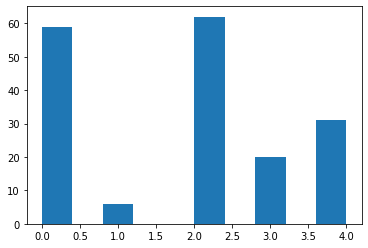

In [20]:
plt.hist(pred)

In [15]:
df_hist, a_bins = np.histogram(pred)

<BarContainer object of 10 artists>

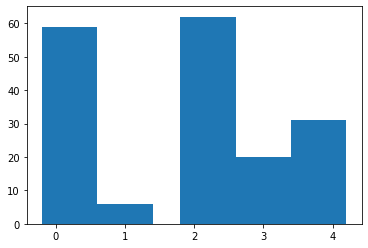

In [19]:
HIST = []
for i in range(1, len(a_bins)):
    HIST.append((a_bins[i-1]+a_bins[i])/2)
plt.bar(HIST, df_hist)